# $$\color{red}{\text{Artificial Intelligence - Camputer Assignment 5 - Part II}}$$

$$\color{orange}{\text{Neural Network}}$$

$$\color{lime}{\text{Alireza Javid - 810099011}}$$

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import cv2
from tensorflow.keras import *
from tensorflow.keras.utils import *
from sklearn.metrics import accuracy_score, classification_report
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import gc

In [22]:
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [23]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


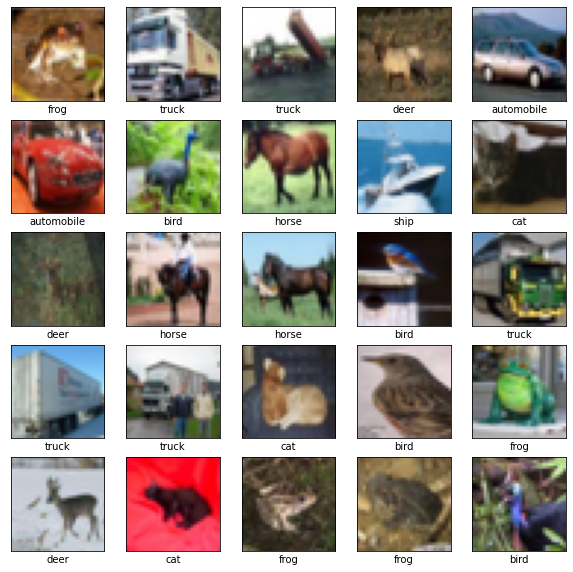

In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])

plt.show()

In [25]:
# Converting the pixels data to float type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
x_train = x_train / 255
x_test = x_test / 255 

# One hot encoding the target class (labels)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [26]:
#model = models.Sequential([
#    layers.Flatten(input_shape=(32,32,3)),
#    layers.Dense(512, activation='relu'),
#    layers.Dense(128, activation='relu'),
#    layers.Dense(num_classes, activation='softmax')
#])
input = layers.Input(shape=(32,32,3))
output = layers.Flatten()(input)
output = layers.Dense(1024, activation='relu')(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dense(128, activation='relu')(output)
output = layers.Dense(256, activation='relu')(output)
output = layers.Dense(128, activation='relu')(output)
output = layers.Dense(256, activation='relu')(output)
output = layers.Dense(10, activation='softmax')(output)

model = models.Model(inputs=input, outputs=output)

In [27]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_27 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_28 (Dense)            (None, 512)               524800    
                                                                 
 dense_29 (Dense)            (None, 128)               65664     
                                                                 
 dense_30 (Dense)            (None, 256)               33024     
                                                                 
 dense_31 (Dense)            (None, 128)               3289

 <p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همان طور که می‌بینید تعداد پارامتر های هر لایه (جز لایه ورودی) برابر است با تعداد نورون های این لایه ضربدر تعداد نورون های لایه قبل به اضافه تعداد نورون های این لایه،‌ زیرا هر نورون در این لایه یک بایاس دارد و به ازای ورودی از هر نورون لایه قبل نیز یک وزن دارد.
همچنین تمام پارامتر ها نیز در شبکه ما قابل آموزش هستند پس تعداد پارامتر های قابل آموزش برابر با تعداد کل پارامتر ها است.</font>
</p>

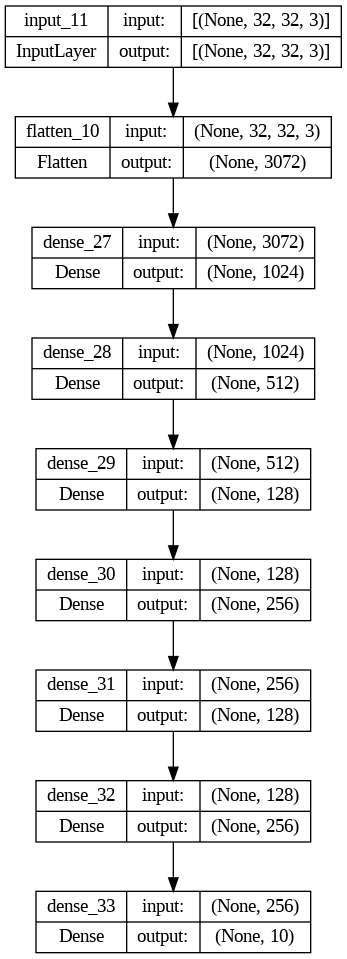

In [28]:
utils.plot_model(model, show_shapes=True, expand_nested=True)

In [29]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy",metrics=['accuracy'])
log = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9400 - accuracy: 0.2918 - val_loss: 1.8178 - val_accuracy: 0.3196
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7066 - accuracy: 0.3862 - val_loss: 1.7226 - val_accuracy: 0.3679
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6033 - accuracy: 0.4254 - val_loss: 1.9325 - val_accuracy: 0.3321
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5373 - accuracy: 0.4497 - val_loss: 1.6053 - val_accuracy: 0.4188
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4825 - accuracy: 0.4693 - val_loss: 1.4963 - val_accuracy: 0.4696
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4364 - accuracy: 0.4857 - val_loss: 1.5823 - val_accuracy: 0.4295
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3956 - accuracy: 0.5010 - val_loss: 1.4814 - val_accuracy:

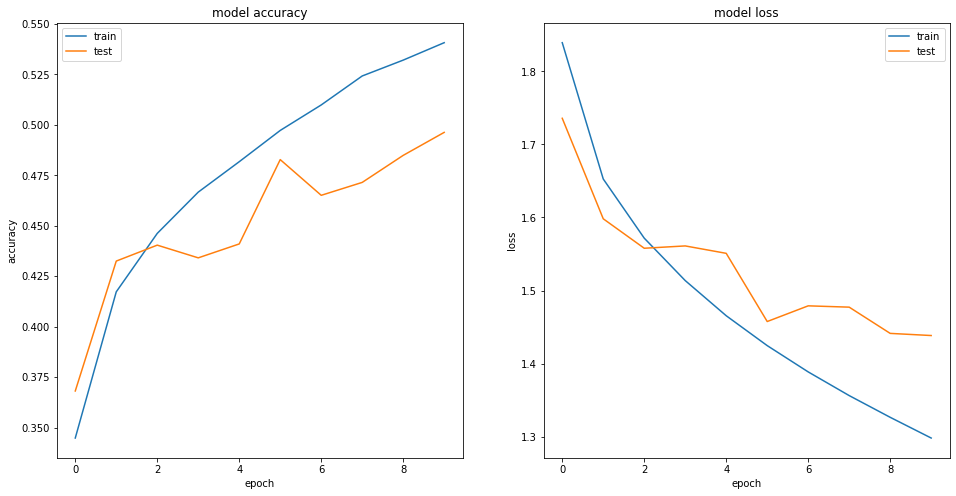

In [10]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.subplot(1,2,2)
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [11]:
train_predict = model.predict(x_train, verbose = 1)
#test_predict = model.predict(x_test, verbose = 1)
print(classification_report(np.argmax(np.array(y_train), axis = 1), np.argmax(np.array(train_predict), axis = 1)))

1563/1563 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.61      0.56      0.58      5000
           1       0.56      0.77      0.65      5000
           2       0.49      0.32      0.38      5000
           3       0.51      0.29      0.37      5000
           4       0.46      0.53      0.49      5000
           5       0.59      0.31      0.41      5000
           6       0.49      0.70      0.58      5000
           7       0.77      0.46      0.57      5000
           8       0.67      0.68      0.67      5000
           9       0.44      0.76      0.55      5000

    accuracy                           0.54     50000
   macro avg       0.56      0.54      0.53     50000
weighted avg       0.56      0.54      0.53     50000



<div dir = "rtl" style = "font-size: 16px">
        momentum
        یک تکنیک ساده است که هم باعث افزایش سرعت آموزش و هم با عث افزایش دقت مدل می‌شوند.
        <br>
        momentum
        در واقع برابر میانگین مشتق های است که با گذر زمان تغییر می‌کنند و ما از آن
        برای به روز رسانی وزن ها در هر گام استفاده می‌کنیم.
        </br>
         در حالت عادی هنگام به روز رسانی وزن ها از حاصل ضرب 
         learning rate
         در مشتق تابع ارور استفاده می‌کنیم. ولی هنگام استفاده از 
         momentum
         در هر بار به روز رسانی وزن ها ، ما ضرب مقدار 
         momentum 
         در وزن ‌های قبلی نیز استفاده می‌کنیم.
         در نتیجه یک
         batch 
         نمیتواند تاثیر چندانی بگذارد و در نتیجه ما سریع تر به مقدار بهینه میل می‌کنیم.
         <br>
         بزرگ بودن مقدار
         momentum
         با عث می‌شود مدل ما یک رفتار رندوم داشته باشد و به مقدار
         بهینه میل نکند و در نتیجه در فرایند یادگیری اختلال ایجاد کند.
         </br>
         همجنین مقدار خیلی کوچک هم تاثیر جندانی نخواهد داشت.
    </div>

In [12]:
input = layers.Input(shape=(32,32,3))
output = layers.Flatten()(input)
output = layers.Dense(1024, activation='relu')(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dense(10, activation='softmax')(output)

model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5), loss="categorical_crossentropy",metrics=['accuracy'])
log = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7970 - accuracy: 0.3562 - val_loss: 1.6440 - val_accuracy: 0.4146
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6074 - accuracy: 0.4298 - val_loss: 1.5416 - val_accuracy: 0.4556
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5254 - accuracy: 0.4597 - val_loss: 1.5517 - val_accuracy: 0.4398
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4630 - accuracy: 0.4819 - val_loss: 1.4578 - val_accuracy: 0.4776
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4130 - accuracy: 0.4969 - val_loss: 1.4585 - val_accuracy: 0.4793
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3695 - accuracy: 0.5171 - val_loss: 1.4201 - val_accuracy: 0.4965
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3301 - accuracy: 0.5312 - val_loss: 1.4147 - val_accuracy:

In [13]:
input = layers.Input(shape=(32,32,3))
output = layers.Flatten()(input)
output = layers.Dense(1024, activation='relu')(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dense(10, activation='softmax')(output)

model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9), loss="categorical_crossentropy",metrics=['accuracy'])
log = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8460 - accuracy: 0.3312 - val_loss: 1.6997 - val_accuracy: 0.3751
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6717 - accuracy: 0.4005 - val_loss: 1.6019 - val_accuracy: 0.4331
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5940 - accuracy: 0.4301 - val_loss: 1.5640 - val_accuracy: 0.4415
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5407 - accuracy: 0.4470 - val_loss: 1.5099 - val_accuracy: 0.4559
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4948 - accuracy: 0.4638 - val_loss: 1.4900 - val_accuracy: 0.4656
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4555 - accuracy: 0.4770 - val_loss: 1.5122 - val_accuracy: 0.4656
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4190 - accuracy: 0.4909 - val_loss: 1.5286 - val_accuracy:

In [15]:
input = layers.Input(shape=(32,32,3))
output = layers.Flatten()(input)
output = layers.Dense(1024, activation='relu')(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dense(10, activation='softmax')(output)

model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.98), loss="categorical_crossentropy",metrics=['accuracy'])
log = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1098 - accuracy: 0.2114 - val_loss: 2.1653 - val_accuracy: 0.1760
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2204 - accuracy: 0.1444 - val_loss: 2.3048 - val_accuracy: 0.1003
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3062 - accuracy: 0.0995 - val_loss: 2.3055 - val_accuracy: 0.0999
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3057 - accuracy: 0.1016 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3069 - accuracy: 0.0992 - val_loss: 2.3065 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3064 - accuracy: 0.0998 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3061 - accuracy: 0.0984 - val_loss: 2.3052 - val_accuracy:

In [10]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
log = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8283 - accuracy: 0.3476 - val_loss: 1.6480 - val_accuracy: 0.4029
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6205 - accuracy: 0.4155 - val_loss: 1.5423 - val_accuracy: 0.4503
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5592 - accuracy: 0.4384 - val_loss: 1.5609 - val_accuracy: 0.4433
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5135 - accuracy: 0.4578 - val_loss: 1.5489 - val_accuracy: 0.4464
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4819 - accuracy: 0.4674 - val_loss: 1.4824 - val_accuracy: 0.4631
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4567 - accuracy: 0.4770 - val_loss: 1.4999 - val_accuracy: 0.4689
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4343 - accuracy: 0.4838 - val_loss: 1.5242 - val_accuracy:

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که می توان دید با adam دقت تست کمی بهتر شده و دقت train نیز تقریبا تغییری نکرد.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
- اثر epoch: 
خیر، همیشه نیاز نیست که چندین epoch داشته باشیم. زیرا بعضی زمان ها که ما به اندازه‌ی کافی دیتا نداریم چند epoch انجام می‌دهیم و در هر epoch از دیتای تکراری برای آموزش مدل استفاده می‌کنیم.
ولی اگر به اندازه ی کافی دیتا داشته باشیم، ممکن است یک epoch هم کافی باشد.
افزایش بیش از اندازه ی epoch ها ممکن است باعث overfitting شود که برای جلوگیری از آن می‌توان آموزش را هر وفت که دقت برای validation data شروع به کاهش کرد، متوقف کنیم. 
</font>
</p>

In [16]:
input = layers.Input(shape=(32,32,3))
output = layers.Flatten()(input)
output = layers.Dense(1024, activation='relu')(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dense(10, activation='softmax')(output)

model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5), loss="mse",metrics=['accuracy'])
log = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.0857 - accuracy: 0.2455 - val_loss: 0.0824 - val_accuracy: 0.2998
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0810 - accuracy: 0.3253 - val_loss: 0.0795 - val_accuracy: 0.3491
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0788 - accuracy: 0.3529 - val_loss: 0.0778 - val_accuracy: 0.3706
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0773 - accuracy: 0.3722 - val_loss: 0.0767 - val_accuracy: 0.3825
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0762 - accuracy: 0.3825 - val_loss: 0.0757 - val_accuracy: 0.3916
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0753 - accuracy: 0.3934 - val_loss: 0.0748 - val_accuracy: 0.3986
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0745 - accuracy: 0.4010 - val_loss: 0.0743 - val_accuracy:

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تاثیر loss function: دقت مدل کاهش می‌یابد، دلیلش این است که Cross-entropy برای مسائل Classification و MSE(mean Sequential) برای مسائل Regression مناسب است. دلیل آن هم این است که در مسائل Classification تعداد جواب های ممکن محدود است و این باعث می‌شود که MSE نتواند درست کار کند. </font>
</p>

In [20]:
input = layers.Input(shape=(32,32,3))
output = layers.Flatten()(input)
output = layers.Dense(1024, activation='relu',)(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(10, activation='softmax')(output)

model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5), loss="categorical_crossentropy",metrics=['accuracy'])
log = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8372 - accuracy: 0.3406 - val_loss: 1.6904 - val_accuracy: 0.3973
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6545 - accuracy: 0.4086 - val_loss: 1.6054 - val_accuracy: 0.4293
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5752 - accuracy: 0.4402 - val_loss: 1.5510 - val_accuracy: 0.4410
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5187 - accuracy: 0.4608 - val_loss: 1.5434 - val_accuracy: 0.4421
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4747 - accuracy: 0.4761 - val_loss: 1.4356 - val_accuracy: 0.4864
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4349 - accuracy: 0.4905 - val_loss: 1.4592 - val_accuracy: 0.4724
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4024 - accuracy: 0.5032 - val_loss: 1.4965 - val_accuracy:

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
شبکه عصبی تمایل دارد تا وزن های قبلی خود را به یاد داشته باشد. در این موارد دقت شبکه به علت overfitting به شدت کاهش می‌یابد که برای حل این مشکل می‌توان از L2 regularization استفاده کرد که در آن هنگام به روز رسانی هر وزن علاوه بر کار هایی که قبلا می‌شد، ضریب ثابتی از وزن قبلی را به وزن جدید اضافه می‌کنیم که این مقدار ثابت از پیش تعینن شده است و ارتباطی با پروسه ی یادگیری ندارد. ‌
ما با این کار از overfitt شدن مدل جلو گیری می‌کنیم. 
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Dropout: این تکنیک به این صورت است که لایه هایی را با عنوان dropout به شبکه عصبی خود اضافه می‌کنیم و این لایه ها با یک drop rate ثابت به صورت رندوم مقدار خروجی برخی از رئوس لایه قبل را حذف می‌کنند و اجازه نمی‌دهند مقادیر تولید شده توسط این رئوس به لایه های بعد منتقل شوند.
دلیل این کار این است که می‌خواهیم شبکه ما نسبت به خرابی مقاوم باشد و حتی با حذف شدن بعضی رئوس نیز همچنان پاسخ درستی به ما بدهد. </font>
</p>